<a href="https://colab.research.google.com/github/Saurabh77-99/MachineLearning/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('/content/Most Streamed Spotify Songs 2024.csv', encoding='latin-1')

In [61]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [62]:
df.shape

(4600, 29)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [64]:
df['Spotify Playlist Count'].isnull().sum()

70

In [65]:
df_missing = pd.DataFrame(df.isnull().sum()).reset_index().rename(columns={'index': 'Track', 0: 'Missing Values'})
df_missing.drop(index=df.index[0], axis=0, inplace=True)
df_missing[df_missing['Missing Values']>0].sort_values(by='Missing Values', ascending=False)

,Track,Missing Values
27,TIDAL Popularity,4600
25,Soundcloud Streams,3333
19,SiriusXM Spins,2123
24,Pandora Track Stations,1268
13,TikTok Posts,1173
23,Pandora Streams,1106
22,Amazon Playlist Count,1055
16,YouTube Playlist Reach,1009
15,TikTok Views,981
14,TikTok Likes,980


In [66]:
df.drop('TIDAL Popularity', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [67]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].fillna(0)
df['Spotify Playlist Count'].isnull().sum()

0

In [68]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].apply(lambda x: str(x).replace(',', ''))
df['Spotify Playlist Count']


0        30716
1        28113
2        54331
3       269802
4         7223
         ...  
4595     65770
4596      4602
4597     72066
4598     14037
4599     32138
Name: Spotify Playlist Count, Length: 4600, dtype: object

In [69]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].astype('int16')

In [70]:
df['Spotify Playlist Count'].dtype

dtype('int16')

In [71]:
df_duplicates = pd.DataFrame(df.duplicated()).rename(columns={0: 'duplicate'})
df_duplicates[df_duplicates['duplicate'] == True]

,duplicate
2450,True
3450,True


In [72]:
df.iloc[2449: 2451]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
2449,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,"12,480,714",...,"129,172",34,5.0,"1,370",49.0,"56,972,562","26,968","1,336,043","708,143",0
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,"12,480,714",...,"129,172",34,5.0,"1,370",49.0,"56,972,562","26,968","1,336,043","708,143",0


In [73]:
df.duplicated().sum()

2

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4600 non-null   int16  
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

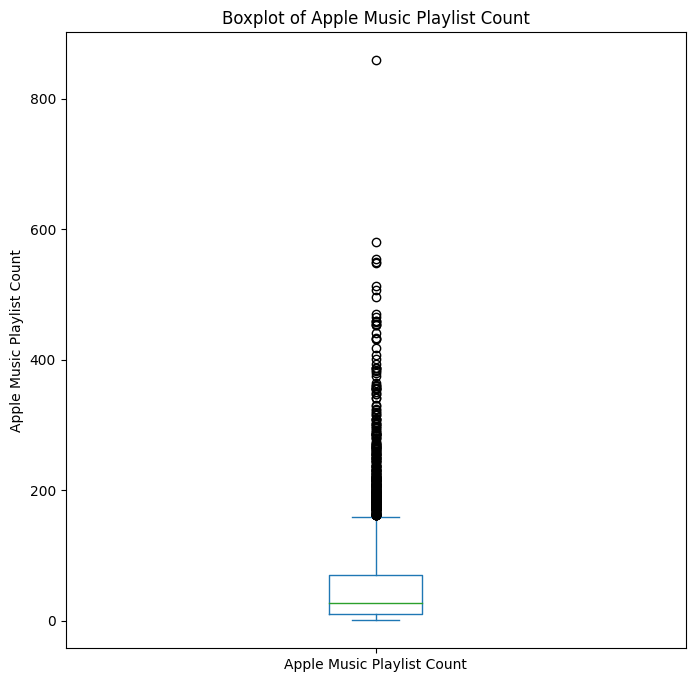

In [114]:
plt.figure(figsize=(8, 8))
df['Apple Music Playlist Count'].plot(kind='box')
plt.title('Boxplot of Apple Music Playlist Count')
plt.ylabel('Apple Music Playlist Count')
plt.show()

In [82]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [83]:
df['Release Month'] = df['Release Date'].dt.month
df['Release Date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: Release Date, Length: 4600, dtype: datetime64[ns]

In [84]:
df['Release Month']

0        4
1        5
2        3
3        1
4        5
        ..
4595     9
4596     7
4597     2
4598    11
4599     4
Name: Release Month, Length: 4600, dtype: int32

In [85]:
df['Release Year'] = df['Release Date'].dt.year
df['Release Year']

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: Release Year, Length: 4600, dtype: int32

In [86]:
df.describe()

,Release Date,Track Score,Spotify Playlist Count,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,Release Month,Release Year
count,4600,4600.000000,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,4600.000000,4600.000000,4600.000000
mean,2021-01-27 07:48:18.782608896,41.844043,2824.197174,63.501581,54.60312,32.310954,25.348942,0.358913,6.046304,2020.616739
min,1987-07-21 00:00:00,19.400000,-32767.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1987.000000
25%,2019-07-16 18:00:00,23.300000,-6049.750000,61.000000,10.00000,5.000000,8.000000,0.000000,3.000000,2019.000000
50%,2022-06-01 00:00:00,29.900000,2854.000000,67.000000,28.00000,15.000000,17.000000,0.000000,6.000000,2022.000000
75%,2023-08-11 00:00:00,44.425000,14601.500000,73.000000,70.00000,37.000000,34.000000,1.000000,9.000000,2023.000000
max,2024-06-14 00:00:00,725.400000,32703.000000,96.000000,859.00000,632.000000,210.000000,1.000000,12.000000,2024.000000
std,NaN,38.543766,16419.474330,16.186438,71.61227,54.274538,25.989826,0.479734,3.419663,3.611707


In [87]:
value_counts = df['Artist'].value_counts()

In [102]:
value_counts.head(65)

Artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
                ..
Shawn Mendes    11
Zach Bryan      11
Maluma          11
NewJeans        11
Adele           10
Name: count, Length: 65, dtype: int64

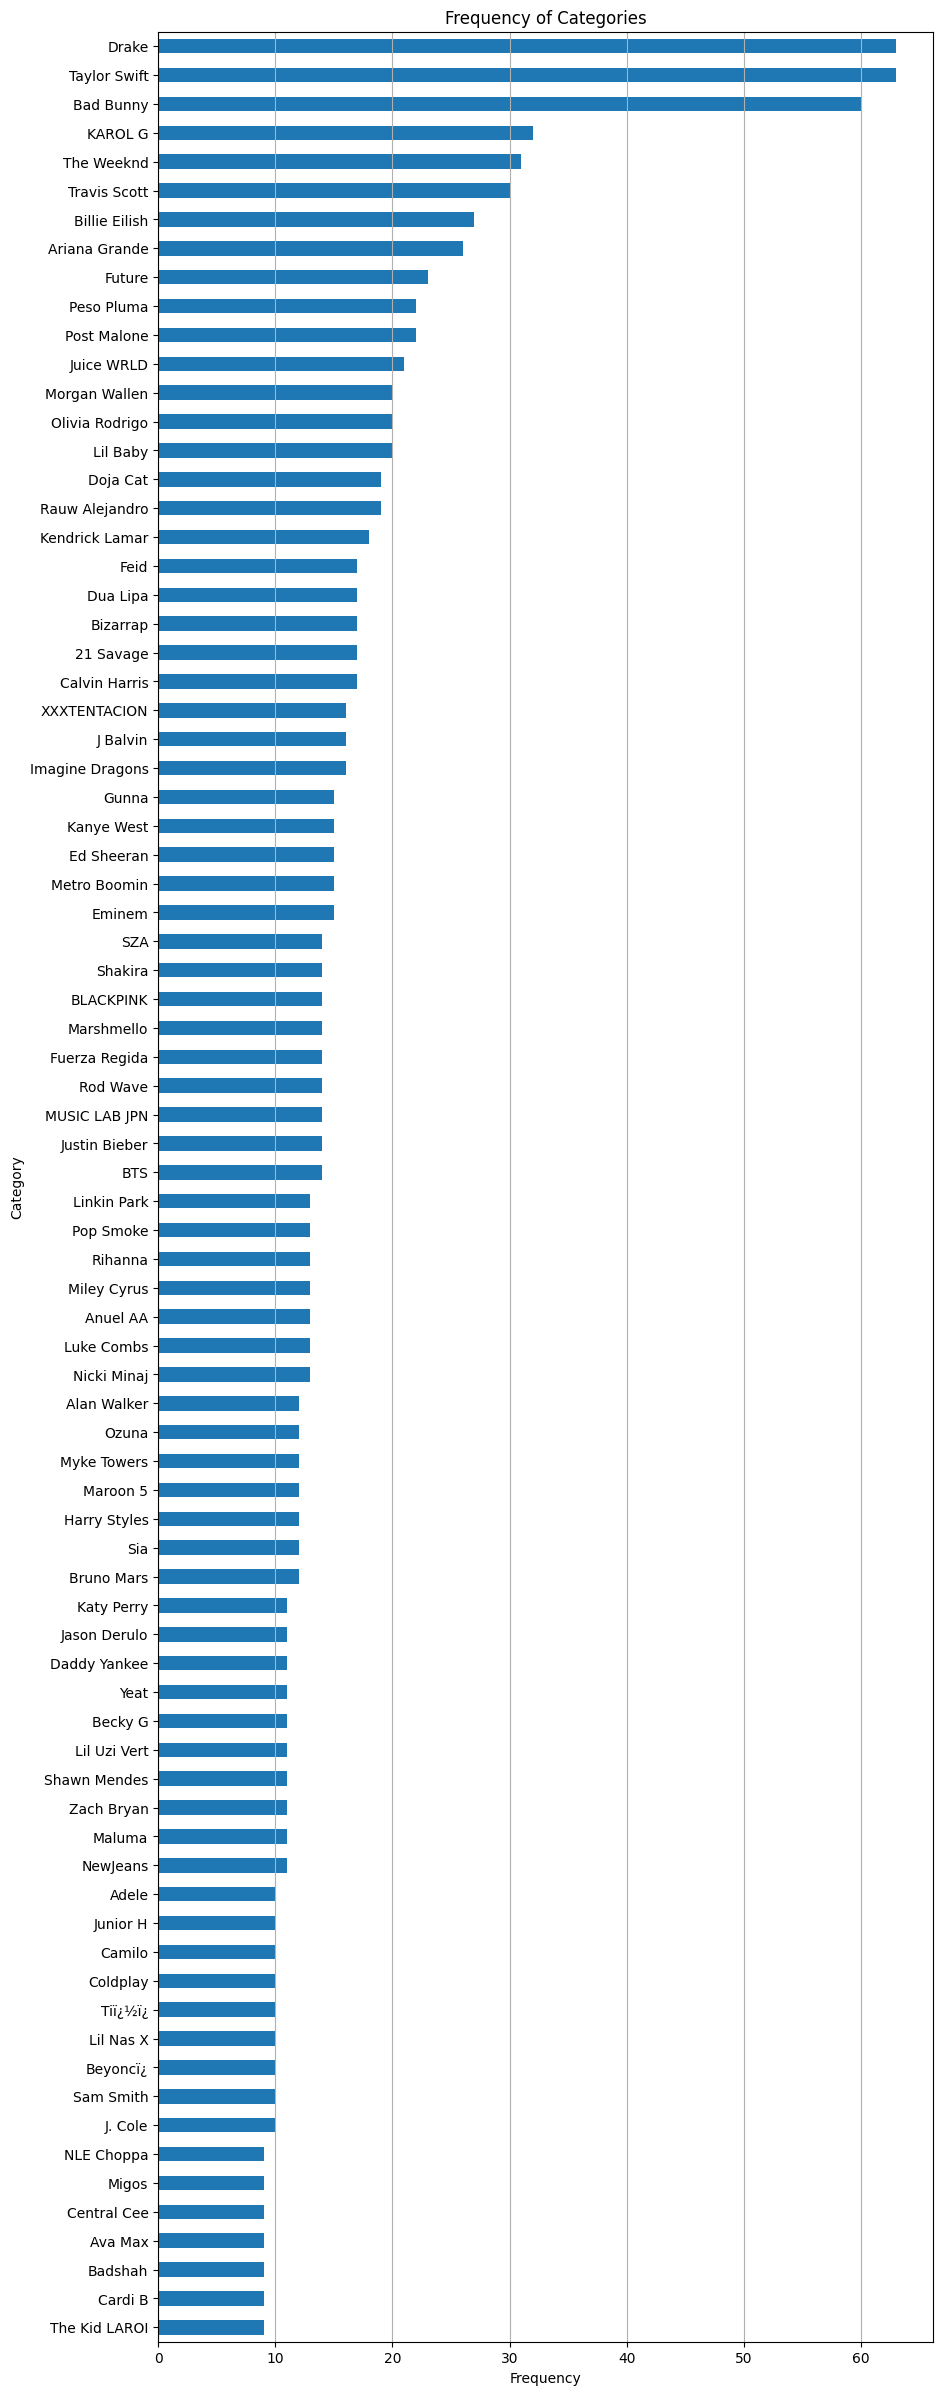

In [110]:
# Create the horizontal bar plot
plt.figure(figsize=(10, 30))
value_counts.head(80).plot(kind='barh')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Frequency of Categories')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest frequency on top
plt.grid(axis='x')
plt.show()

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   object        
 8   Spotify Playlist Count      4600 non-null   int16         
 9   Spotify Playlist Reach      4528 non-null   object        
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   object      

In [112]:
numerical_cols = [col for col in df.columns if df[col].dtype not in ['object', 'category', 'datetime64[ns]']]
numerical_cols

['Track Score',
 'Spotify Playlist Count',
 'Spotify Popularity',
 'Apple Music Playlist Count',
 'Deezer Playlist Count',
 'Amazon Playlist Count',
 'Explicit Track',
 'Release Month',
 'Release Year']

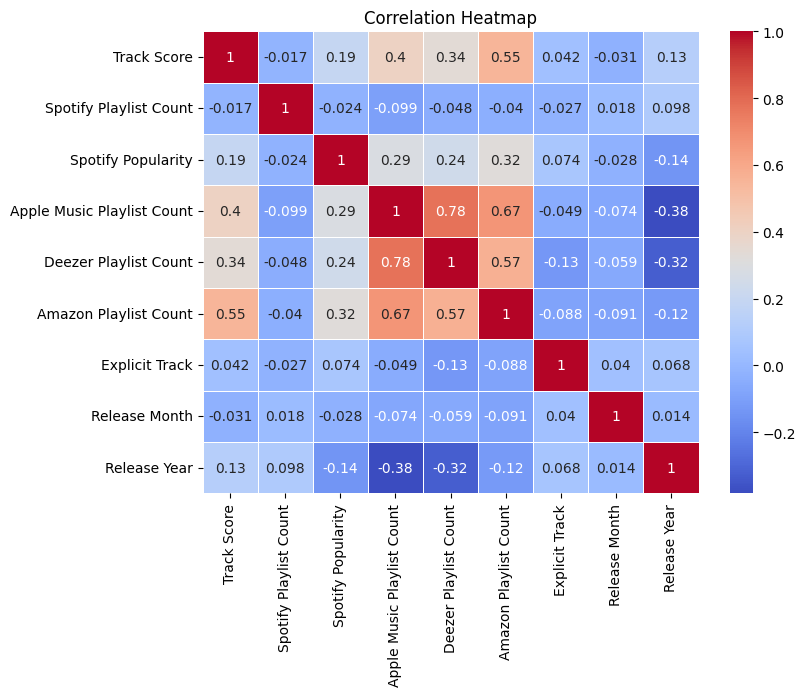

In [113]:
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()